# E01

## Approach
Find ix given the last two characters.

In [3]:
import torch

In [4]:
words = list(open('names.txt', 'r').read().splitlines())
words[:3]

['emma', 'olivia', 'ava']

In [5]:
l = ['.'] + sorted(set(i for w in words for i in w))
stoi = {s: i for i, s in enumerate(l)}
itos = {i: s for i, s in enumerate(l)}

In [6]:
# E02
idx = torch.randint(high=len(words), size=(len(words),))
split_test = int(.8 * len(words))
idx_test = idx[:split_test]
idx_dev = idx[split_test: ]

words_test = [words[i] for i in idx_test]
words_dev = [words[i] for i in idx_dev]


In [7]:
N = torch.zeros([27, 27, 27], dtype=torch.int32)
for w in words_test:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        N[stoi[c1], stoi[c2], stoi[c3]] += 1
N

tensor([[[   0, 3561, 1031,  ...,  104,  386,  747],
         [   0,  179,  136,  ...,   22,  136,  119],
         [   0,  104,    0,  ...,    0,    4,    0],
         ...,
         [   0,   35,    0,  ...,    0,   19,   11],
         [   0,  157,    0,  ...,    0,    0,    1],
         [   0,  361,    0,  ...,    0,   89,    2]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  27,    0,    3,  ...,    0,   17,    9],
         [  28,   19,   14,  ...,    0,    8,    0],
         ...,
         [  11,    3,    0,  ...,   18,    6,    3],
         [ 125,  315,   10,  ...,    0,   15,   29],
         [  24,  107,    0,  ...,    0,    6,   13]],

        [[   0,    0,    0,  ...,    0,    0,    0],
         [  35,    3,    6,  ...,    4,   20,    3],
         [   0,    4,    0,  ...,    0,    5,    0],
         ...,
         [   0,    0,    0,  ...,    0,    0,    0],
         [  44,    5,    1,  ...,    0,    0,    0],
         [   0,    0,    0,  ...,    0,    0,    0]],

In [8]:
N.shape

torch.Size([27, 27, 27])

In [9]:
N += 1
P = N.float()
P /= P.sum(2, keepdim=True)
P[0]

tensor([[3.8982e-05, 1.3885e-01, 4.0229e-02, 4.6895e-02, 5.2898e-02, 4.7480e-02,
         1.3020e-02, 2.1557e-02, 2.6742e-02, 1.7776e-02, 7.5742e-02, 9.5466e-02,
         5.0131e-02, 8.0147e-02, 3.6526e-02, 1.1617e-02, 1.5125e-02, 3.2355e-03,
         5.2625e-02, 6.2020e-02, 4.0697e-02, 2.7287e-03, 1.1266e-02, 8.8489e-03,
         4.0931e-03, 1.5086e-02, 2.9158e-02],
        [2.7871e-04, 5.0167e-02, 3.8183e-02, 8.0825e-03, 8.4727e-02, 1.2821e-02,
         4.7380e-03, 3.9019e-03, 2.5362e-02, 4.1527e-02, 6.9677e-03, 1.6165e-02,
         1.4353e-01, 8.6399e-02, 1.3852e-01, 2.5084e-03, 3.3445e-03, 2.2297e-03,
         1.0897e-01, 4.0691e-02, 1.7280e-02, 3.3166e-02, 5.1003e-02, 1.3935e-03,
         6.4103e-03, 3.8183e-02, 3.3445e-02],
        [9.4518e-04, 9.9244e-02, 9.4518e-04, 9.4518e-04, 9.4518e-04, 2.0510e-01,
         9.4518e-04, 9.4518e-04, 9.4518e-03, 3.7807e-02, 9.4518e-04, 9.4518e-04,
         6.1437e-02, 9.4518e-04, 9.4518e-04, 6.5217e-02, 9.4518e-04, 9.4518e-04,
         4.8110e-

In [10]:
for i in range(10):
    ix = 0
    out = ['.', '.']
    while True:
        ix = torch.multinomial(P[stoi[out[-2]], stoi[out[-1]]], 1, replacement=True).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(*out, sep="")

..clo
..ranes
..douun
..lettha
..maheolarmisa
..kinbi
..nyelstyrid
..kamy
..janoramdidhmonizel
..ane


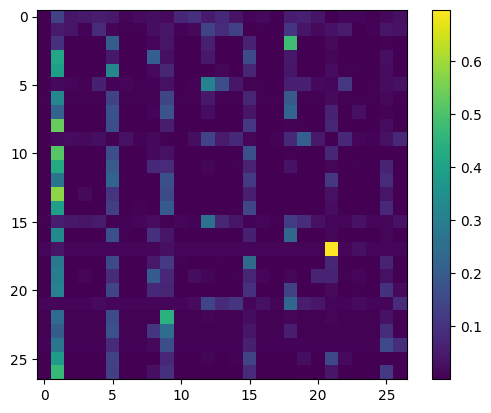

In [11]:
import matplotlib.pyplot as plt

plt.imshow(P[0])
plt.colorbar()

In [12]:
P[0][0]

tensor([3.8982e-05, 1.3885e-01, 4.0229e-02, 4.6895e-02, 5.2898e-02, 4.7480e-02,
        1.3020e-02, 2.1557e-02, 2.6742e-02, 1.7776e-02, 7.5742e-02, 9.5466e-02,
        5.0131e-02, 8.0147e-02, 3.6526e-02, 1.1617e-02, 1.5125e-02, 3.2355e-03,
        5.2625e-02, 6.2020e-02, 4.0697e-02, 2.7287e-03, 1.1266e-02, 8.8489e-03,
        4.0931e-03, 1.5086e-02, 2.9158e-02])

In [13]:
# loss
nll = 0.0
n = 0
for w in words_dev:
    word = ".." + w + "."
    for c1, c2, c3 in zip(word, word[1:], word[2:]):
        prob = P[stoi[c1], stoi[c2], stoi[c3]]
        nll += -prob.log()
        n += 1
print(f"{nll=}, {nll/n}")

nll=tensor(101635.8828), 2.2370989322662354


# E02

In [14]:
idx = torch.randint(high=len(words), size=(len(words),))
split_test = int(.8 * len(words))
idx_test = idx[:split_test]
idx_dev = idx[split_test: ]

words_test = [words[i] for i in idx_test]
words_dev = [words[i] for i in idx_dev]

In [15]:
words_dev

['aethan',
 'abbigayle',
 'adylynn',
 'ettalyn',
 'azariyah',
 'miyu',
 'electra',
 'kyriakos',
 'bobby',
 'cally',
 'amyra',
 'stellan',
 'ramadan',
 'nairoby',
 'elisee',
 'maverick',
 'viraat',
 'sonam',
 'shaqir',
 'adiel',
 'agustina',
 'shaan',
 'kamil',
 'amoret',
 'quincey',
 'maeven',
 'zeena',
 'nixon',
 'maanya',
 'bryton',
 'jourdan',
 'moosa',
 'jahsir',
 'melaney',
 'jaylaa',
 'hila',
 'reon',
 'maleia',
 'royalty',
 'kiaria',
 'jaleah',
 'ferguson',
 'nesta',
 'mikela',
 'emmerick',
 'yugan',
 'aarya',
 'jerell',
 'chelsi',
 'pierre',
 'gaia',
 'lamya',
 'akin',
 'adom',
 'lilyona',
 'ngawang',
 'owsley',
 'samai',
 'esgar',
 'avalee',
 'avyana',
 'michael',
 'kie',
 'sonam',
 'liamjames',
 'malayasia',
 'amrit',
 'demian',
 'brancen',
 'bernard',
 'yavuz',
 'tyrell',
 'taya',
 'arlington',
 'moustapha',
 'temiloluwa',
 'bryson',
 'meyer',
 'janovia',
 'pax',
 'korii',
 'jacen',
 'nialah',
 'saryn',
 'armor',
 'deric',
 'jeanna',
 'hallie',
 'cyn',
 'nickson',
 'kaleece'

## Bigram Model (Probabilistic)

In [16]:
Nbi = torch.zeros([27, 27])
for w in words:
    word = "." + w + "."
    for c1, c2 in zip(word, word[1:]):
        Nbi[stoi[c1], stoi[c2]] += 1
N

tensor([[[   1, 3562, 1032,  ...,  105,  387,  748],
         [   1,  180,  137,  ...,   23,  137,  120],
         [   1,  105,    1,  ...,    1,    5,    1],
         ...,
         [   1,   36,    1,  ...,    1,   20,   12],
         [   1,  158,    1,  ...,    1,    1,    2],
         [   1,  362,    1,  ...,    1,   90,    3]],

        [[   1,    1,    1,  ...,    1,    1,    1],
         [  28,    1,    4,  ...,    1,   18,   10],
         [  29,   20,   15,  ...,    1,    9,    1],
         ...,
         [  12,    4,    1,  ...,   19,    7,    4],
         [ 126,  316,   11,  ...,    1,   16,   30],
         [  25,  108,    1,  ...,    1,    7,   14]],

        [[   1,    1,    1,  ...,    1,    1,    1],
         [  36,    4,    7,  ...,    5,   21,    4],
         [   1,    5,    1,  ...,    1,    6,    1],
         ...,
         [   1,    1,    1,  ...,    1,    1,    1],
         [  45,    6,    2,  ...,    1,    1,    1],
         [   1,    1,    1,  ...,    1,    1,    1]],

In [17]:
Pbi = (Nbi + 0).float()
Pbi /= Pbi.sum(1, keepdim=True)
Pbi

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [18]:
for i in range(5):
    ix = 0
    out = []
    while True:
        ix = torch.multinomial(Pbi[ix], 1, True).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(*out, sep="")

yslato
lidrien
nn
leyn
hen


In [19]:
Pbi[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [20]:
# loss
nll = 0.
n = 0
for w in words_dev:
    word = "." + w + "."
    for ch1, ch2 in zip(word, word[1:]):
        probs = Pbi[stoi[ch1], stoi[ch2]]
        nll += -probs.log()
        n += 1
print(f"{nll=}, {nll/n}")

nll=tensor(112292.8984), 2.461591958999634


## Single Neuron Prediction

In [21]:
xs, ys = [], []
for w in words:
    word = '.' + w + '.'
    for x, y in zip(word, word[1:]):
        xs.append(stoi[x])
        ys.append(stoi[y])
xs[:5], ys[:5]

([0, 5, 13, 13, 1], [5, 13, 13, 1, 0])

In [49]:
import torch.nn.functional as F

xenc = F.one_hot(torch.tensor(xs), num_classes=27).float()
xenc.dtype

torch.float32

In [56]:
W = torch.randn((27, 27), requires_grad=True)
W.shape

torch.Size([27, 27])

In [80]:
for i in range(20):
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    loss = -probs[torch.arange(len(xs)), ys].log().mean()
    print(i+1, loss.item(), sep=": ")

    W.grad = None
    loss.backward()
    W.data -= 50 * W.grad


1: 2.468815565109253
2: 2.4685215950012207
3: 2.468238592147827
4: 2.467966318130493
5: 2.4677038192749023
6: 2.4674503803253174
7: 2.4672060012817383
8: 2.466970205307007
9: 2.4667420387268066
10: 2.4665215015411377
11: 2.466308355331421
12: 2.46610164642334
13: 2.465902328491211
14: 2.4657087326049805
15: 2.4655210971832275
16: 2.465339183807373
17: 2.465163230895996
18: 2.4649922847747803
19: 2.4648284912109375
20: 2.464672803878784


In [97]:
g = torch.Generator().manual_seed(2147483647)

out = ["."]
while True:
    ix = stoi[out[-1]]
    x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = x @ W
    count = logits.exp()
    prob = count / count.sum(1, keepdim=True)
    pred = prob.multinomial(num_samples=1, replacement=True, generator=g)
    out.append(itos[pred.item()])
    if out[-1] == ".":
        break
print(*out, sep="")

.cexze.
